In [1]:
%reset -f
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
from memtools import *
from scipy import signal
import scipy.integrate as integrate
import mpltex
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch

ver()

This is memtools version 1.11


In [5]:
x1 = np.genfromtxt('tauM(001-01)tau(0001-0005-001-005-01-05-1-5).txt').T
x2 = np.genfromtxt('tauM(001-01)tau(10-50-100).txt').T
xT = np.genfromtxt('U(1-3-5)tau(0001-0005-001-005-01-05-1-5-10-50-100).txt').T

xG = np.genfromtxt('G1G2tG103tG231tM001.txt').T
xG2 = np.genfromtxt('G1G2tG1003tG231tM001.txt').T

Top = np.genfromtxt('tauM(0001-001-01)tau(001-01-1)Top.txt').T
#TopS = np.genfromtxt('tauM(0001-001-01)tau(001-01-1)TopS.txt').T

In [6]:
def U(x,U0):
    return U0*(x**2-1)**2

In [7]:
def F(x,U0):
    return (integrate.quad(lambda y: np.exp(U(y,U0)), -1, 1)[0]**(-1))*integrate.quad(lambda z: np.exp(U(z,U0)), x, 1)[0]

def C(g,U0):
    return g*(integrate.quad(lambda z: np.exp(U(z,U0)), -1, 1)[0])

In [8]:
def TG(g,U0):
    return g*(integrate.quad(lambda z: np.exp(U(z,U0)), -1, 1)[0])*integrate.quad(lambda z: (F(z,U0)*(1-F(z,U0)))/np.exp(U(z,U0)), -1, 1)[0]

In [9]:
def TPG(g,U0):
    #return ((C(g,U0)*F(x0,U0)/(1-F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(1-F(z,U0))**2, -1, 0)[0]))+((C(g,U0)*(1-F(x0,U0))/(F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(F(z,U0))**2, 0, 1)[0]))
    return (C(g,U0)*(integrate.quad(lambda z: np.exp(-U(z,U0))*(1-F(z,U0))**2, -1, 0)[0]))+(C(g,U0)*(integrate.quad(lambda z: np.exp(-U(z,U0))*(F(z,U0))**2, 0, 1)[0]))

def TPG1(g,U0):
    #return ((C(g,U0)*F(x0,U0)/(1-F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(1-F(z,U0))**2, -1, 0)[0]))+((C(g,U0)*(1-F(x0,U0))/(F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(F(z,U0))**2, 0, 1)[0]))
    return (C(g,U0)*(integrate.quad(lambda z: np.exp(-U(z,U0))*(1-F(z,U0))**2, -1, 0)[0]))


def TPG2(g,U0):
    #return ((C(g,U0)*F(x0,U0)/(1-F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(1-F(z,U0))**2, -1, 0)[0]))+((C(g,U0)*(1-F(x0,U0))/(F(x0,U0)))*(integrate.quad(lambda z: np.exp(-U(z,U0))*(F(z,U0))**2, 0, 1)[0]))
    return (C(g,U0)*(integrate.quad(lambda z: np.exp(-U(z,U0))*(F(z,U0))**2, 0, 1)[0]))

In [10]:
def TGL(g,U0):
    return g*(integrate.quad(lambda z: np.exp(U(z,U0)), -1, 0)[0])*integrate.quad(lambda z: (F(z,U0)*(1-F(z,U0)))/np.exp(U(z,U0)), -1, 0)[0]

def TGR(g,U0):
    return g*(integrate.quad(lambda z: np.exp(U(z,U0)), 0, 1)[0])*integrate.quad(lambda z: (F(z,U0)*(1-F(z,U0)))/np.exp(U(z,U0)), 0, 1)[0]


In [11]:
def TM(m,U0):
    return (integrate.quad(lambda E: np.exp(U0-E)*(integrate.quad(lambda x: np.sqrt((m/2)/(E-U(x,U0))), -1, 1)[0]), U0, np.inf)[0])

In [12]:
def Prova1(m, a, b, c):
    return a*np.sqrt(m) + b*np.log(c*1)/1

def Prova3(m, a, b, c):
    return a*np.sqrt(m) + b*np.log(c*3)/3

def Prova5(m, a, b, c):
    return a*np.sqrt(m) + b*np.log(c*5)/5

In [13]:
popt1, pcov = curve_fit(Prova1, xT[1:,0], xT[1:,1])
print(popt1)
popt3, pcov = curve_fit(Prova3, xT[1:,0], xT[1:,2])
print(popt3)
popt5, pcov = curve_fit(Prova5, xT[1:,0], xT[1:,3])
print(popt5)

[1.47519245 1.00437034 1.6179634 ]
[1.14880497 1.84636963 0.51015762]
[1.00657561 1.47031676 0.36140946]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [14]:
def K(U):  ###Harmonic potentia
    return (2*U)

def Delta(g, m, U):
    return (g**2 + 4*m*K(U))

def Lambda(g,m,U):
    return (-g + np.sqrt(Delta(g, m, U)))/(2*m)

def A(g,m,U,C):
    return np.log((4*np.sqrt(Delta(g, m, U))/(g + np.sqrt(Delta(g, m, U))))*np.exp(C))

def tau(g,m,U,C):
    return ((1/Lambda(g,m,U))*(np.log(U) + A(g,m,U,C)))

def taug(g,U,C):
    return ((g/K(U))*np.log(2*np.exp(C)*U))

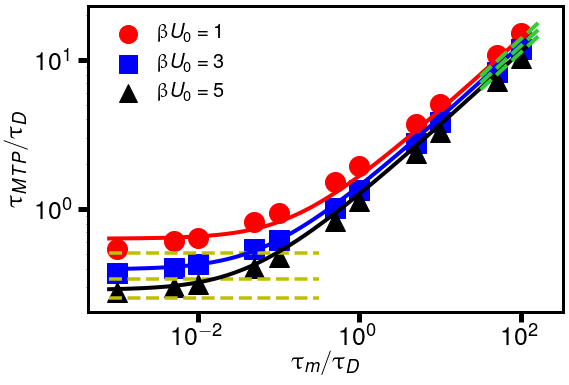

In [15]:
mS = np.logspace(-3.1, -0.5, 200)
mL = np.logspace(1.5,2.25, 200)
m = np.logspace(-3.1, 2.1, 200)
m2 = np.logspace(-3.1, 2.1, 50)
TM2 = np.vectorize(TM)

@mpltex.acs_decorator
def my_plot():
    
    fig,ax=plt.subplots(1,1,figsize=(8,5))        

    ax.plot(x1[1:,0],x1[1:,6],'ro',markersize=20,label = '$\\beta U_0 = 1$')
    ax.plot(x2[1:,0],x2[1:,6],'ro',markersize=20)#, alpha=0.5)
    ax.plot(x1[1:,0],x1[1:,8],'sb',markersize=20,label = '$\\beta U_0 = 3$')
    ax.plot(x2[1:,0],x2[1:,8],'sb',markersize=20)#, alpha=0.5)
    #ax.plot(x1[1:,0],x1[1:,7],'*c',markersize=15)
    #ax.plot(x2[1:,0],x2[1:,7],'*c',markersize=15)
    ax.plot(x1[1:,0],x1[1:,10],'^k',markersize=20,label = '$\\beta U_0 = 5$')
    ax.plot(x2[1:,0],x2[1:,10],'^k',markersize=20)#, alpha=0.5)
    #ax.plot(x1[1:,0],x1[1:,9],'*y',markersize=15)
    #ax.plot(x2[1:,0],x2[1:,9],'*y',markersize=15)
    
    ax.plot(mS, np.ones(200)*TG(1,1), '--y', linewidth=3.5)    ###jan m->0
    ax.plot(mS, np.ones(200)*TG(1,3), '--y',linewidth=3.5)
    ax.plot(mS, np.ones(200)*TG(1,5), '--y',linewidth=3.5)

    #ax.plot(mL, TM2(mL,1), '*r', linewidth=3.5)               ###jan \gamma->0
    #ax.plot(mL, TM2(mL,3), '*b',linewidth=3.5)
    #ax.plot(mL, TM2(mL,5), '*k',linewidth=3.5)
    
    #ax.plot(m, TM2(m,1)+ np.ones(200)*TG(1,1), '-.r', linewidth=2.5) ###jan qualsiasi m
    #ax.plot(m, TM2(m,3)+ np.ones(200)*TG(1,3), '-.b',linewidth=2.5)
    #ax.plot(m, TM2(m,5)+ np.ones(200)*TG(1,5), '-.k',linewidth=2.5)
    
    #ax.plot(m, np.sqrt(m*np.pi/2)+np.log(2*np.exp(0.577)*1)/2, '-.r', linewidth=2.5)
    #ax.plot(m, np.sqrt(m*np.pi/2)+np.log(2*np.exp(0.577)*3)/(2*3), '-.b', linewidth=2.5)
    #ax.plot(m, np.sqrt(m*np.pi/2)+np.log(2*np.exp(0.577)*5)/(2*5), '-.k', linewidth=2.5)
    
    ax.plot(m, tau(1,m,1,0.577), '-r', linewidth=4)   ###Carlon qualsiasi m
    ax.plot(m, tau(1,m,3,0.577), '-b', linewidth=4) 
    ax.plot(m, tau(1,m,5,0.577), '-k', linewidth=4)

    #ax.plot(m2, np.sqrt(m2/2)*np.log(4*np.exp(0.577)*1)+np.log(2*np.exp(0.577)*1)/2, '-.r', linewidth=3)    ###Orland qualsisasi m 
    #ax.plot(m2, np.sqrt(m2/(2*3))*np.log(4*np.exp(0.577)*3)+np.log(2*np.exp(0.577)*3)/(2*3), '-.b', linewidth=3)
    #ax.plot(m2, np.sqrt(m2/(2*5))*np.log(4*np.exp(0.577)*5)+np.log(2*np.exp(0.577)*5)/(2*5), '-.k', linewidth=3)
    
    #ax.plot(mS,np.ones(200)*taug(1,1,0.577), '--y', linewidth=4) ###Carlon m->0
    #ax.plot(mS,np.ones(200)*taug(1,3,0.577), '--y', linewidth=4)
    #ax.plot(mS,np.ones(200)*taug(1,5,0.577), '--y', linewidth=4)
    
    ax.plot(mL,np.sqrt(mL/2)*np.log(4*np.exp(0.577)*1), '--',color ='limegreen', linewidth=4) ###Carlon \gamma->0
    ax.plot(mL,np.sqrt(mL/(2*3))*np.log(4*np.exp(0.577)*3), '--',color ='limegreen', linewidth=4)
    ax.plot(mL,np.sqrt(mL/(2*5))*np.log(4*np.exp(0.577)*5), '--',color ='limegreen', linewidth=4)
    
    #ax.plot(m, Prova1(m, *popt1), '-r', linewidth=2.5)
    #ax.plot(m, Prova3(m, *popt3), '-b', linewidth=2.5)
    #ax.plot(m, Prova5(m, *popt5), '-k', linewidth=2.5)
    
    ax.set_ylabel('$\\tau_{MTP}/\\tau_D$', fontsize=25)
    ax.set_xlabel('$\\tau_m/\\tau_D$', fontsize=25)#
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(fontsize=20)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    
    plt.show(block=False)
    fig.savefig('charlon2.pdf',bbox_inches='tight')#,fonttype=42)
    plt.close(fig)
my_plot() 

In [16]:
def K2(U0):  ##quadratic potential
    return (8*U0)

#def K2(U0):  ##quadratic potential Negative 
 #   return -(8*U0)   #Diverge per intermediate tau!!!

def geff(m, tau, g, U0, c2):
    return (g/(1 + c2*K2(U0)*(tau**2)/m))  ##c2 = 2/3

def geff2(m, tau, g, U0, c1,c2):
    return (m/(2*c1*tau)+(tau*K2(U0))/(2*c1)+g/2
            -(m/(2*c1*tau))*np.sqrt((1+(K2(U0)*tau**2)/m 
                                     - (c1*tau*g)/m)**2 +(4*c2*c1*g*K2(U0)*tau**3)/(m**2)))
def geffH(m, tau, g, U0, c3):
    return (g/2)*(1 + np.sqrt(1 + 4*c3*(tau*tau)*(K2(U0)*K2(U0))/(g*g)))

def meff(m, tau, g):
    return (m-(64/3)*tau*g) 

def meff2(m, tau, g, c1):
    return m/(1+(c1*(tau*g)/m))  ##c1 = 64/3

In [17]:
def Tau(m, tau, g, U0, c1,c2):
    return ((1/Lambda(geff(m, tau, g, U0, c2),meff2(m, tau, geff(m, tau, g, U0, c2),c1),U0))*(np.log(U0)+ 
                A(geff(m, tau, g, U0, c2),meff2(m, tau, geff(m, tau, g, U0, c2),c1),U0,0.577)))

def TauGH(m, tau, g, U0, c1):
    return ((1/Lambda(g,meff2(m, tau, g,c1),U0))*(np.log(U0)+ A(g,meff2(m, tau, g,c1),U0,0.577)))

def FormulaA(U0,tau,M):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (1/2)*(np.pi/(2*np.sqrt(2)))*(1/(1 + (2*U0**2)*tau)) +2*np.sqrt(M*U0)))

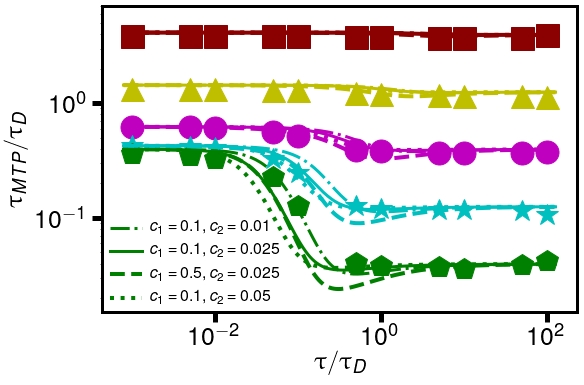

In [18]:
tauS = np.logspace(-3.1, -0.5, 200)
tauL = np.logspace(0.5,2.1, 200)
tau = np.logspace(-3.1, 2.1, 200)

@mpltex.acs_decorator
def my_plot():
    
    fig,ax=plt.subplots(1,1,figsize=(8,5))        

    ax.plot(x1[1:,0],x1[1:,5],'s',color='darkred',markersize=23)#,label = '$\\tau_m /\\tau_D = 10$')
    ax.plot(x2[1:,0],x2[1:,5],'s',color='darkred',markersize=23)
    ax.plot(x1[1:,0],x1[1:,4],'^y',markersize=23)#,label = '$\\tau_m /\\tau_D = 1$')
    ax.plot(x2[1:,0],x2[1:,4],'^y',markersize=23)
    ax.plot(x1[1:,0],x1[1:,3],'o', color='m',markersize=23)#,label = '$\\tau_m /\\tau_D = 0.1$')
    ax.plot(x2[1:,0],x2[1:,3],'o', color='m',markersize=23)
    ax.plot(x1[1:,0],x1[1:,2],'*c',markersize=23)#,label = '$\\tau_m /\\tau_D = 0.01$')
    ax.plot(x2[1:,0],x2[1:,2],'*c',markersize=23)
    ax.plot(x1[1:,0],x1[1:,1],'pg',markersize=23)#,label = '$\\tau_m /\\tau_D = 0.001$')
    ax.plot(x2[1:,0],x2[1:,1],'pg',markersize=23)
    
    ax.plot(tau, Tau(0.001, tau, 1, 3, 0.1,1./(100)), '-.g', linewidth=3, label= '$c_1 = 0.1, c_2 =0.01$')
    ax.plot(tau, Tau(0.01, tau, 1, 3, 0.1,1./(100)), '-.c', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.1, tau, 1, 3,0.1,1./(100)), '-.m', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(1, tau, 1, 3, 0.1,1./(100)), '-.y', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(10, tau, 1, 3, 0.1,1./(100)), '-.',color='darkred', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    
    ax.plot(tau, Tau(0.001, tau, 1, 3, 0.1,1./(40)), '-g', linewidth=3, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.01, tau, 1, 3, 0.1,1./(40)), '-c', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.1, tau, 1, 3,0.1,1./(40)), '-m', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(1, tau, 1, 3, 0.1,1./(40)), '-y', linewidth=3)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(10, tau, 1, 3, 0.1,1./(40)), '-',color='darkred', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    
    ax.plot(tau, Tau(0.001, tau, 1, 3, 0.5,1./(40)), '--g', linewidth=4, label= '$c_1 = 0.5, c_2 =0.025$')
    ax.plot(tau, Tau(0.01, tau, 1, 3, 0.5,1./(40)), '--c', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.1, tau, 1, 3,0.5,1./(40)), '--m', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(1, tau, 1, 3, 0.5,1./(40)), '--y', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(10, tau, 1, 3, 0.5,1./(40)), '--',color='darkred', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    
    
    ax.plot(tau, Tau(0.001, tau, 1, 3, 0.1,1./(20)), ':g', linewidth=4, label= '$c_1 = 0.1, c_2 =0.05$')
    ax.plot(tau, Tau(0.01, tau, 1, 3, 0.1,1./(20)), ':c', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.1, tau, 1, 3,0.1,1./(20)), ':m', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(1, tau, 1, 3, 0.1,1./(20)), ':y', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(10, tau, 1, 3, 0.1,1./(20)), ':',color='darkred', linewidth=4)#, label= '$c_1 = 0.1, c_2 =0.025$')
    
    ax.set_ylim([0.015,7])
    
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.legend(fontsize=16,bbox_to_anchor=(0.41, 0.35))#bbox_to_anchor=(1., 1))
    
    ax.set_ylabel('$\\tau_{MTP}/\\tau_D$', fontsize=25)
    ax.set_xlabel('$\\tau/\\tau_D$', fontsize=25)#
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    
    plt.show(fig)
    #fig.savefig('PathNonMarkT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.close(fig)
my_plot() 

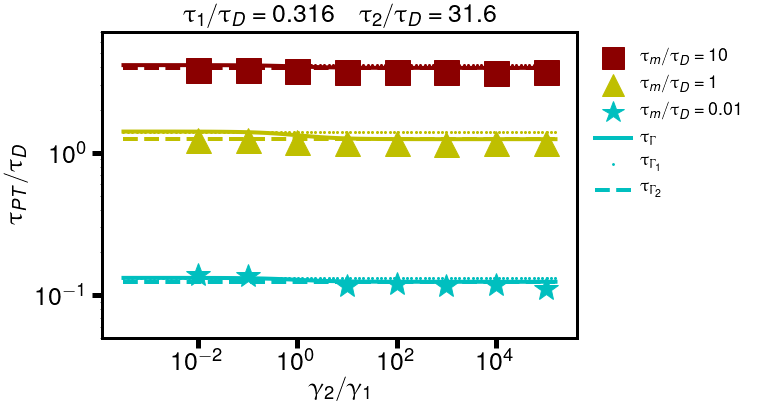

In [19]:
G = np.logspace(-3.5, 5.2, 100)
one = np.ones(100)

@mpltex.acs_decorator
def my_plot():
    
    fig,ax=plt.subplots(1,1,figsize=(8,5))        

    ax.plot(xG[0,1:],xG[3,1:],'s',color='darkred',markersize=25,label = '$\\tau_m /\\tau_D = 10$')
    ax.plot(xG[0,1:],xG[2,1:],'^y',markersize=25,label = '$\\tau_m /\\tau_D = 1$')
    ax.plot(xG[0,1:],xG[1,1:],'*c',markersize=25,label = '$\\tau_m /\\tau_D = 0.01$')
    
    ax.plot(G, (1/(G+1))*Tau(0.01, 0.316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(0.01, 31.6, 1, 3, 0.1,1./(40)), '-c', linewidth=4, label='$\\tau_{\\Gamma}$')
    ax.plot(G, (1/(G+1))*Tau(1, 0.316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(1, 31.6, 1, 3, 0.1,1./(40)), '-y', linewidth=4)
    ax.plot(G, (1/(G+1))*Tau(10, 0.316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(10, 31.6, 1, 3, 0.1,1./(40)), '-', color = 'darkred', linewidth=4)
    
    ax.plot(G, Tau(0.01, 0.316, 1, 3, 0.1,1./(40))*one, '.c', linewidth=4, label='$\\tau_{\\Gamma_1}$')
    ax.plot(G, Tau(1, 0.316, 1, 3, 0.1,1./(40))*one, '.y', linewidth=4)
    ax.plot(G, Tau(10, 0.316, 1, 3, 0.1,1./(40))*one, '.', color = 'darkred', linewidth=4)
    
    ax.plot(G, Tau(0.01, 31.6, 1, 3, 0.1,1./(40))*one, '--c', linewidth=4, label='$\\tau_{\\Gamma_2}$')
    ax.plot(G, Tau(1, 31.6, 1, 3, 0.1,1./(40))*one, '--y', linewidth=4)
    ax.plot(G, Tau(10, 31.6, 1, 3, 0.1,1./(40))*one, '--', color = 'darkred', linewidth=4)
    
    #ax.plot(G, (1/(G+1))*Tau(0.001, 0.316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(0.001, 31.6, 1, 3, 0.1,1./(40)), '-m', linewidth=4)
    #ax.plot(G, Tau(0.001, 31.6, 1, 3, 0.1,1./(40))*one, '--m', linewidth=4)
    #ax.plot(G, Tau(0.001, 0.316, 1, 3, 0.1,1./(40))*one, '.m', linewidth=4)
    
    ax.set_ylim([0.05,7])
    
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.legend(fontsize=18,bbox_to_anchor=(1., 1))#bbox_to_anchor=(1., 1))
    
    ax.set_ylabel('$\\tau_{PT}/\\tau_D$', fontsize=25)
    ax.set_xlabel('$\\gamma_2/\\gamma_1$', fontsize=25)#
    ax.set_title('$\\tau_{1}/\\tau_D = 0.316 \quad \\tau_2/\\tau_D = 31.6$', fontsize=25)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    
    plt.show(fig)
    #fig.savefig('PathNonMark2tau103tau230.pdf',bbox_inches='tight')#,fonttype=42)
    plt.close(fig)
my_plot() 

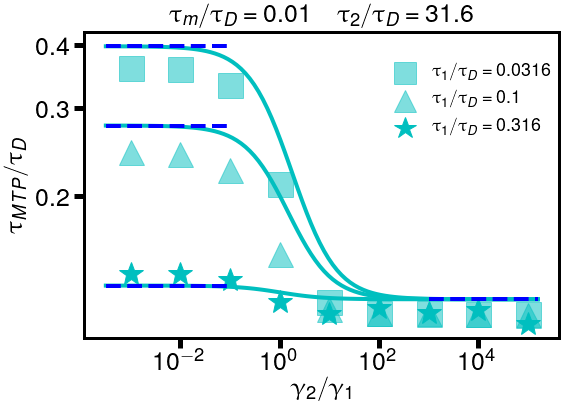

In [20]:
#def Tau(m, tau, g, U0, c1,c2):
G = np.logspace(-3.5, 5.2, 100)
GS = np.logspace(-3.5, -1., 100)
GL = np.logspace(3., 5.2, 100)
one = np.ones(100)

@mpltex.acs_decorator
def my_plot():
    
    fig,ax=plt.subplots(1,1,figsize=(8,5)) 
    

    ax.plot(xG2[0,1:],xG2[1,1:],'s',alpha = 0.5,color='c',markersize=25,label = '$\\tau_1 /\\tau_D = 0.0316$')
    ax.plot(xG2[0,1:],xG2[2,1:],'^',alpha = 0.5,color='c',markersize=25,label = '$\\tau_1 /\\tau_D = 0.1$')
    ax.plot(xG2[0,1:],xG2[3,1:],'*c',markersize=25,label = '$\\tau_1 /\\tau_D = 0.316$')
    
    ax.plot(G, (1/(G+1))*Tau(0.01, 0.0316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(0.01, 31.6, 1, 3, 0.1,1./(40)), '-c', linewidth=4)
    ax.plot(G, (1/(G+1))*Tau(0.01, 0.1, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(0.01, 31.6, 1, 3, 0.1,1./(40)), '-c', linewidth=4)
    ax.plot(G, (1/(G+1))*Tau(0.01, 0.316, 1, 3, 0.1,1./(40))+(G/(G+1))*Tau(0.01, 31.6, 1, 3, 0.1,1./(40)), '-c', linewidth=4)

    ax.plot(GL, Tau(0.01, 31.6, 1, 3, 0.1,1./(40))*one, '--b', linewidth=4)
   
    ax.plot(GS, Tau(0.01, 0.0316, 1, 3, 0.1,1./(40))*one, '--b', linewidth=4)
    ax.plot(GS, Tau(0.01, 0.1, 1, 3, 0.1,1./(40))*one, '--b', linewidth=4)
    ax.plot(GS, Tau(0.01, 0.316, 1, 3, 0.1,1./(40))*one, '--b', linewidth=4)
   
    ax.tick_params(labelsize=25,length = 10,width = 5)
    
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.legend(fontsize=18,bbox_to_anchor=(0.6, 0.95))#bbox_to_anchor=(1., 1))
    
    ax.set_ylabel('$\\tau_{MTP}/\\tau_D$', fontsize=25)
    ax.set_xlabel('$\\gamma_2/\\gamma_1$', fontsize=25)#
    ax.set_title('$\\tau_m/\\tau_D = 0.01 \quad\\tau_2/\\tau_D = 31.6$', fontsize=25)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_yticks([0.2,0.3,0.4])
    y_formatter = FixedFormatter(["$0.2$", "$0.3$", "$0.4$"])
    y_locator = FixedLocator([0.2,0.3,0.4])
    ax.yaxis.set_major_formatter(y_formatter)

   
    plt.show(fig)
    #fig.savefig('PathNonMark2Tau2.pdf',bbox_inches='tight')#,fonttype=42)
    plt.close(fig)
my_plot() 

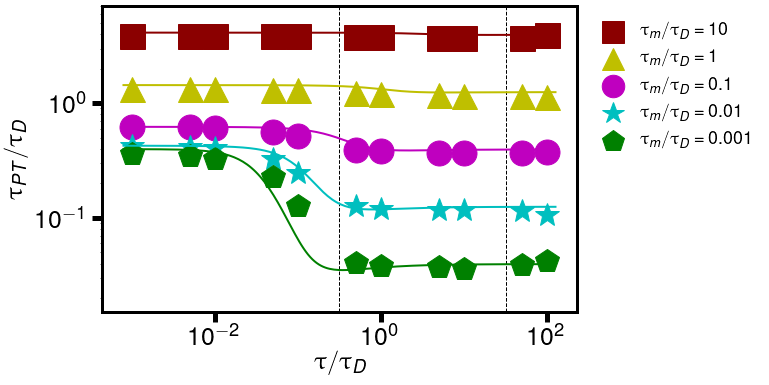

In [21]:
tauS = np.logspace(-3.1, -0.5, 200)
tauL = np.logspace(0.5,2.1, 200)
tau = np.logspace(-3.1, 2.1, 200)
y = np.ones(200)

@mpltex.acs_decorator
def my_plot():
    
    fig,ax=plt.subplots(1,1,figsize=(8,5))        

    ax.plot(x1[1:,0],x1[1:,5],'s',color='darkred',markersize=25,label = '$\\tau_m /\\tau_D = 10$')
    ax.plot(x2[1:,0],x2[1:,5],'s',color='darkred',markersize=25)
    ax.plot(x1[1:,0],x1[1:,4],'^y',markersize=25,label = '$\\tau_m /\\tau_D = 1$')
    ax.plot(x2[1:,0],x2[1:,4],'^y',markersize=25)
    ax.plot(x1[1:,0],x1[1:,3],'o', color='m',markersize=25,label = '$\\tau_m /\\tau_D = 0.1$')
    ax.plot(x2[1:,0],x2[1:,3],'o', color='m',markersize=25)
    ax.plot(x1[1:,0],x1[1:,2],'*c',markersize=25,label = '$\\tau_m /\\tau_D = 0.01$')
    ax.plot(x2[1:,0],x2[1:,2],'*c',markersize=25)
    ax.plot(x1[1:,0],x1[1:,1],'pg',markersize=25,label = '$\\tau_m /\\tau_D = 0.001$')
    ax.plot(x2[1:,0],x2[1:,1],'pg',markersize=25)
    
    ax.plot((31.6)*y,tau,'--k',markersize=25)
    ax.plot((0.316)*y,tau,'--k',markersize=25)
    
    ax.plot(tau, Tau(0.001, tau, 1, 3, 0.1,1./(40)), '-g', linewidth=2)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.01, tau, 1, 3, 0.1,1./(40)), '-c', linewidth=2)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(0.1, tau, 1, 3,0.1,1./(40)), '-m', linewidth=2)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(1, tau, 1, 3, 0.1,1./(40)), '-y', linewidth=2)#, label= '$c_1 = 0.1, c_2 =0.025$')
    ax.plot(tau, Tau(10, tau, 1, 3, 0.1,1./(40)), '-',color='darkred', linewidth=2)#, label= '$c_1 = 0.1, c_2 =0.025$')
    
    
    ax.set_ylim([0.015,7])
    
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.legend(fontsize=18,bbox_to_anchor=(1., 1))#bbox_to_anchor=(1., 1))
    
    ax.set_ylabel('$\\tau_{PT}/\\tau_D$', fontsize=25)
    ax.set_xlabel('$\\tau/\\tau_D$', fontsize=25)#
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    
    plt.show(fig)
    fig.savefig('PathNonMarkP3.pdf',bbox_inches='tight')#,fonttype=42)
    plt.close(fig)
my_plot() 